# Introduction to data analysis: Data Frames and vizualisation

-- [SICSS Zürich 2021](https://github.com/computational-social-science-zurich/sicss-zurich) -- 
 ## Preambule

This notebooks walks you through some basic programming excercises in julia to get you acquainted with using julia and jupyter notebooks.

<span style='color:green'> Questions to answer are in green</span>

### Core Julia basic knowledge
 => See the learning resources at: https://julialang.org/learning/

### Loading Packages

One of the things that makes julia such a powerful programming+statistical tool are the freely available and high quality packages which are constantly being written by users and contributors daily. For our purposes we will be loading two packages: 

* `DataFrames` package for data management;
* `Plots` for plotting, and `StatsPlots` for nicer plots

In [1]:
using DataFrames
using HTTP
using CSV
using Plots
using StatsPlots
using CategoricalArrays # For categorical variables

### Background

We will be using the [Stop, Question and Frisk Data from the NYPD](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page) which contains information about over 100,000 police citizen interactions between 2003-2016 (but we use it for 2016 only).

Throughout the notebook, we study how individual level characteristics correlates with being arrested, aim at describing whether arrests are showing evidence of racism. 

We will explore the connection between the following variables:

* **arstmade** - Was an arrest made?
* **race** - Race of the suspect.
* **timestop** - Time that the suspect was stopped. 
* **datestop** - Date that the suspect was stopped. 
* **age** - Suspect's age.


## Importing and cleaning data

In [2]:
# Get the file from URL
url = "https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/stop-question-frisk/sqf-2016.csv"
data = DataFrame(CSV.File(HTTP.get(url).body))
data = data[1:end-1,:]
df =  allowmissing(data)
first(df, 5)

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs
,String?,String?,String?,String?,String?,String?,String?,String?,String?
1,2016,41,22,2072016,100,A,O,P,1.00
2,2016,10,22,2182016,30,1,O,P,8.00
3,2016,66,1,1012016,30,1,I,P,2.00
4,2016,47,18,1012016,40,1,O,H,1.00
5,2016,79,1,1012016,50,1,O,P,3.00


### Looking at the data

In [3]:
println(names(df))

["year", "pct", "ser_num", "datestop", "timestop", "recstat", "inout", "trhsloc", "perobs", "crimsusp", "perstop", "typeofid", "explnstp", "othpers", "arstmade", "arstoffn", "sumissue", "sumoffen", "compyear", "comppct", "offunif", "officrid", "frisked", "searched", "contrabn", "adtlrept", "pistol", "riflshot", "asltweap", "knifcuti", "machgun", "othrweap", "pf_hands", "pf_wall", "pf_grnd", "pf_drwep", "pf_ptwep", "pf_baton", "pf_hcuff", "pf_pepsp", "pf_other", "radio", "ac_rept", "ac_inves", "rf_vcrim", "rf_othsw", "ac_proxm", "rf_attir", "cs_objcs", "cs_descr", "cs_casng", "cs_lkout", "rf_vcact", "cs_cloth", "cs_drgtr", "ac_evasv", "ac_assoc", "cs_furtv", "rf_rfcmp", "ac_cgdir", "rf_verbl", "cs_vcrim", "cs_bulge", "cs_other", "ac_incid", "ac_time", "rf_knowl", "ac_stsnd", "ac_other", "sb_hdobj", "sb_outln", "sb_admis", "sb_other", "repcmd", "revcmd", "rf_furt", "rf_bulg", "offverb", "offshld", "forceuse", "sex", "race", "dob", "age", "ht_feet", "ht_inch", "weight", "haircolr", "eyeco

In [4]:
size(df)

(12404, 112)

This tells us that we have 12,405 observations (stops) and have 112 variables which were collected for the stops.

In [5]:
first(df, 5)

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs
,String?,String?,String?,String?,String?,String?,String?,String?,String?
1,2016,41,22,2072016,100,A,O,P,1.00
2,2016,10,22,2182016,30,1,O,P,8.00
3,2016,66,1,1012016,30,1,I,P,2.00
4,2016,47,18,1012016,40,1,O,H,1.00
5,2016,79,1,1012016,50,1,O,P,3.00


## Summary statistics

Show some summary statistics:

### <span style='color:green'> Share of people arrested $=>$ clean this variable</span>

In [6]:
x = data[:, :arstmade]
describe(x)

Summary Stats:
Length:         12404
Type:           String
Number Unique:  2


In [7]:
first(x,3)

3-element PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}:
 "N"
 "N"
 "Y"

There seeems to be a missing variable: remove the observation 

In [8]:
levels(x) # No missing variable. The last line was empty and I removed it, but if you wanted to remove it, the next line could:

2-element Vector{String}:
 "N"
 "Y"

In [9]:
x[x .!= " "]

12404-element PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}:
 "N"
 "N"
 "Y"
 "N"
 "N"
 "N"
 "N"
 "N"
 "Y"
 "N"
 "Y"
 "Y"
 "N"
 ⋮
 "N"
 "N"
 "Y"
 "N"
 "N"
 "N"
 "N"
 "N"
 "N"
 "N"
 "Y"
 "N"

### <span style='color:green'>Distribution of race</span>

In [10]:
combine(groupby(data, :race), nrow)

,race,nrow
,String,Int64
1,B,6498
2,W,1270
3,P,873
4,A,737
5,Q,2753
6,U,95
7,Z,140
8,I,38


### <span style='color:green'>Number and % of people arrested and % of people not arrested within each racial category.</span>

In other words, of the people that are arrested, what percent are Black, White, Hispanic etc. Of the people that are not arrested, what percent are Black, White, Hispanic etc..

Use the `groupby` syntax from `DataFrames`: https://dataframes.juliadata.org/stable/lib/functions/#DataFrames.groupby

In [11]:
combine(groupby(data, [:arstmade, :race]), :race => length => :n)

,arstmade,race,n
,String,String,Int64
1,N,B,5194
2,N,W,1008
3,N,P,674
4,N,A,619
5,N,Q,2044
6,N,U,71
7,N,Z,119
8,N,I,32
9,Y,B,1304


**Percentage of people from different racial category, for the frisked group and non-frisked group, respectively**

In [12]:
n = size(data)[1]
groups = groupby(data, [:arstmade, :race])
combine(groups,
    :race => length => :n,
    :race => (x -> length(x)./n) => :percentage,
)

,arstmade,race,n,percentage
,String,String,Int64,Float64
1,N,B,5194,0.418736
2,N,W,1008,0.0812641
3,N,P,674,0.0543373
4,N,A,619,0.0499033
5,N,Q,2044,0.164786
6,N,U,71,0.00572396
7,N,Z,119,0.00959368
8,N,I,32,0.00257981
9,Y,B,1304,0.105127


## Visualization

### <span style='color:green'>Plot the distribution of race among stopped individual</span>

In [13]:
n = size(data)[1]
arrested = data[data[:,:arstmade] .== "Y", :]
groups = groupby(arrested, :race)
dist = combine(groups,
    :race => length => :n,
)

,race,n
,String,Int64
1,B,1304
2,W,262
3,P,199
4,A,118
5,Q,709
6,U,24
7,Z,21
8,I,6


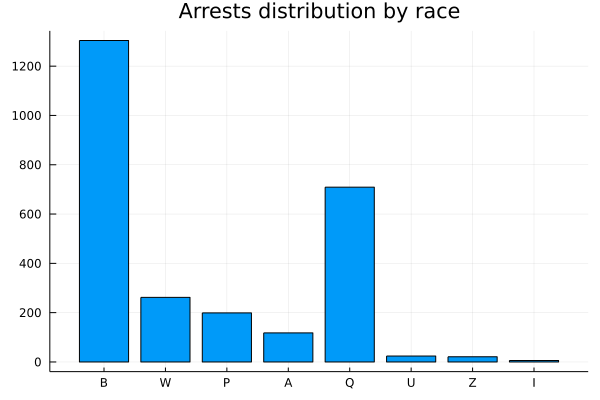

In [14]:
bar(dist.race, dist.n, label = nothing, title="Arrests distribution by race")

### Create a plot of arrests made vs. race 

#### <span style='color:green'>Create a variable `arst_dummy` equal to 1 if the stop led to an arrest and 0 if not.</span>

You can use the `transform` function from DataFrames. https://dataframes.juliadata.org/stable/lib/functions/#DataFrames.transform

In [15]:
df = copy(data)
df = transform(df, :arstmade => (x-> x=="Y" ? 1 : 0) => :arst_dummy)
"arst_dummy" in names(df)

true

#### <span style='color:green'>Represent the previous summary statistics for the percent of people within each racial group that were arrested  with a bar plot instead.</span>

The bar plot should have the title "Percent of Racial Group Arrested".
Now you can plot arrests made vs. race using the previous dummy. 
You can try the `groupedbar` function from `StatsPlots`, or the line type `bar` for the `plot` function call.

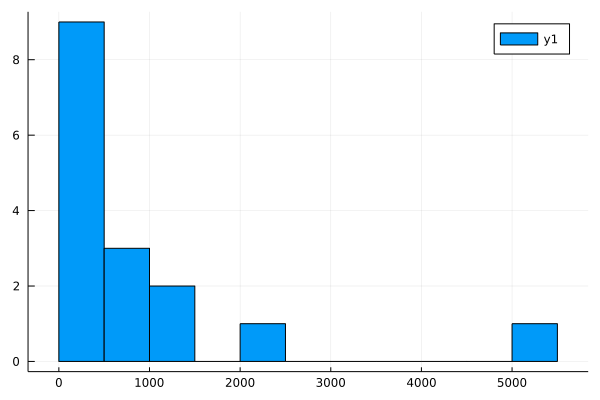

In [16]:
n = size(data)[1]
groups = groupby(data, [:arstmade, :race])
df = combine(groups,
    :race => length => :n,
    :race => (x -> length(x)./n) => :percentage,
    :arstmade => (x-> x=="Y" ? 1 : 0) => :arst_dummy
)
@df df histogram(:race, :n, groupby=:arst_dummy)

### What is the distrbution of ages by those who are arrested vs. not?

#### <span style='color:green'>Cleaning step: convert `age` to a numeric</span>

In [17]:
age = []
for num in data[:,:age]
    try
        push!(age, parse(Int, num)) # Some rows have ** instead of a number for age
    catch e
        continue
    end
end
Int.(age)

12370-element Vector{Int64}:
 48
 20
 34
 33
 22
 30
 27
 35
 22
 25
 14
 38
 56
  ⋮
 18
 19
 36
 29
 38
 15
 14
 19
 38
 22
 25
 27

#### <span style='color:green'>Plot the age distribution by those who are arrested vs. not</span>

You can use `density` from StatsPlots or `histogram` from Plots 

In [18]:
df = data[:,[:arstmade, :age]]
df = df[df[!,:age] .!= "**", :] # remove that ** from age
df[!,:age] = parse.(Int, df[!,:age])
first(df, 5)

,arstmade,age
,String,Int64
1,N,48
2,N,20
3,Y,34
4,N,33
5,N,22


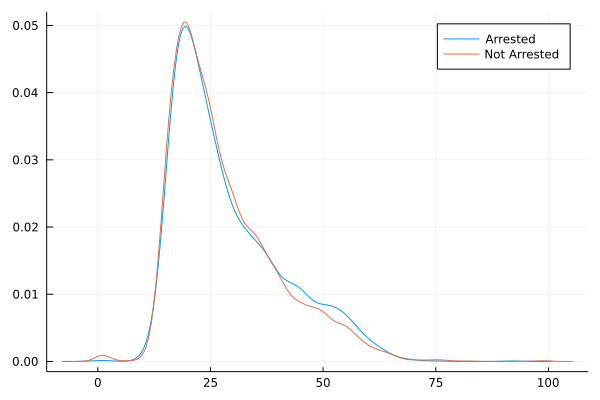

In [19]:
Y = df[df[!,:arstmade] .== "Y", :age];
N = df[df[!,:arstmade] .== "N", :age];
density(Y, label="Arrested")
density!(N, label="Not Arrested")

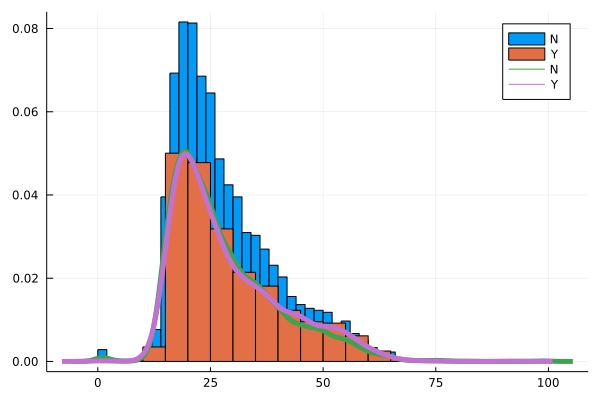

In [20]:
@df df histogram(:age, group=:arstmade, weights = ones(length(:age))./length(:age))
@df df density!(:age, group=:arstmade, lw=5)

### Writing function & using loops

Many of the variables in the stop and frisk data are coded as "Y" for "Yes" and "N" for no. 

#### <span style='color:green'>Propose an easy means of recoding every variable in the stop and frisk data set using a function that you define. </span>

In order to save some time from having to recode every single variable that contains a "Y" or a "N", write a function that transforms:

* "Y" codings to 1
* "N" codings to 0
* " " codings to nothing (missing)

You should be able to use this function in an `apply` framework.

In [21]:
transform!(df,
    :arstmade => CategoricalArray => :arstmade
)
first(df,5)

,arstmade,age
,Cat…,Int64
1,N,48
2,N,20
3,Y,34
4,N,33
5,N,22


#### <span style='color:green'>`for` loop </span>

Using the `yesno` function, write a loop that transforms every single variable in the "stopandfrisk2016" data frame containing a "Y" or "N" coding into "1", "0" or "missing" codings as specified above. 

Save these newly coded variables in a data frame called `recoded` and use the `first()` function to print out the first few observations of the new dataframe that you created.

In [22]:
yesno(x) = x == "Y" ? 1 : 0 # individual elements
arst = []
for i in df[:,:arstmade]
    push!(arst, yesno(i))
end
Int.(arst)


12370-element Vector{Int64}:
 0
 0
 1
 0
 0
 0
 0
 0
 1
 0
 1
 1
 0
 ⋮
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 1
 0

## Going further: Plot arrest rate depending on hour of the day

In [23]:
# Calculate the overall arrest rate

In [24]:
# Calculate the hourly arrest rate

In [25]:
# Plot of 'hourly_arrest_rate'